In [12]:
import os
import unittest
import numpy as np
import pandas as pd
import matplotlib
import warnings
from sklearn.datasets import make_classification, make_regression
from ProQSAR.ModelDeveloper.model_validation import cross_validation_report
warnings.filterwarnings("ignore", category=FutureWarning)

def create_classification_data(
    n_samples=60, n_features=25, n_informative=10, random_state=42
) -> pd.DataFrame:
    """
    Generate a DataFrame containing synthetic classification data.

    Args:
        n_samples (int): The number of samples.
        n_features (int): The number of features.
        n_informative (int): The number of informative features.
        random_state (int): Seed for random number generation.

    Returns:
        pd.DataFrame: DataFrame with features, ID, and activity columns.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    data = pd.DataFrame(X, columns=[f"Feature{i}" for i in range(1, n_features + 1)])
    data["ID"] = np.arange(n_samples)
    data["Activity"] = y
    return data


scoring_list = [
            "roc_auc",
            "average_precision",
            "accuracy",
            "recall",
            "precision",
            "f1",
            "neg_log_loss",
            "neg_brier_score",
        ]
select_model = ["LogisticRegression", "KNeighborsClassifier", "SVC", "ExtraTreesClassifier", "AdaBoostClassifier"]

class_data = create_classification_data()
cv_result = cross_validation_report(
    class_data, 
    activity_col="Activity", 
    id_col="ID", 
    n_splits=5, 
    n_repeats=5,
    scoring_list=scoring_list,
    select_model=select_model,
    save_csv=False)
from IPython.display import display
display(cv_result)
from ProQSAR.Analysis.statistical_analysis import StatisticalAnalysis

report_long = StatisticalAnalysis.extract_scoring_dfs(report_df=cv_result, scoring_list=scoring_list)
display(report_long)

/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 28.
  warnings.warn(
/home/labhhc3/anaconda3/envs/proqsar/lib/python3.11/site-packages/sklearn/linear

,LogisticRegression,KNeighborsClassifier,SVC,ExtraTreesClassifier,AdaBoostClassifier
roc_auc_mean,0.764000,0.864000,0.931000,0.899000,0.828000
roc_auc_std,0.121000,0.083000,0.067000,0.077000,0.138000
roc_auc_median,0.806000,0.861000,0.944000,0.917000,0.861000
roc_auc_fold1,0.555556,0.819444,0.888889,0.722222,0.694444
roc_auc_fold2,0.861111,0.916667,0.916667,0.888889,0.750000
...,...,...,...,...,...
neg_brier_score_fold21,-0.340943,-0.201458,-0.166281,-0.169692,-0.188182
neg_brier_score_fold22,-0.274422,-0.203750,-0.077275,-0.204142,-0.169953
neg_brier_score_fold23,-0.217476,-0.170833,-0.124345,-0.175033,-0.200012
neg_brier_score_fold24,-0.102624,-0.177292,-0.073204,-0.174342,-0.223155


,scoring,cv_cycle,method,value
0,roc_auc,roc_auc_fold1,LogisticRegression,0.555556
1,roc_auc,roc_auc_fold2,LogisticRegression,0.861111
2,roc_auc,roc_auc_fold3,LogisticRegression,0.777778
3,roc_auc,roc_auc_fold4,LogisticRegression,0.777778
4,roc_auc,roc_auc_fold5,LogisticRegression,0.944444
...,...,...,...,...
995,neg_brier_score,neg_brier_score_fold21,AdaBoostClassifier,-0.188182
996,neg_brier_score,neg_brier_score_fold22,AdaBoostClassifier,-0.169953
997,neg_brier_score,neg_brier_score_fold23,AdaBoostClassifier,-0.200012
998,neg_brier_score,neg_brier_score_fold24,AdaBoostClassifier,-0.223155


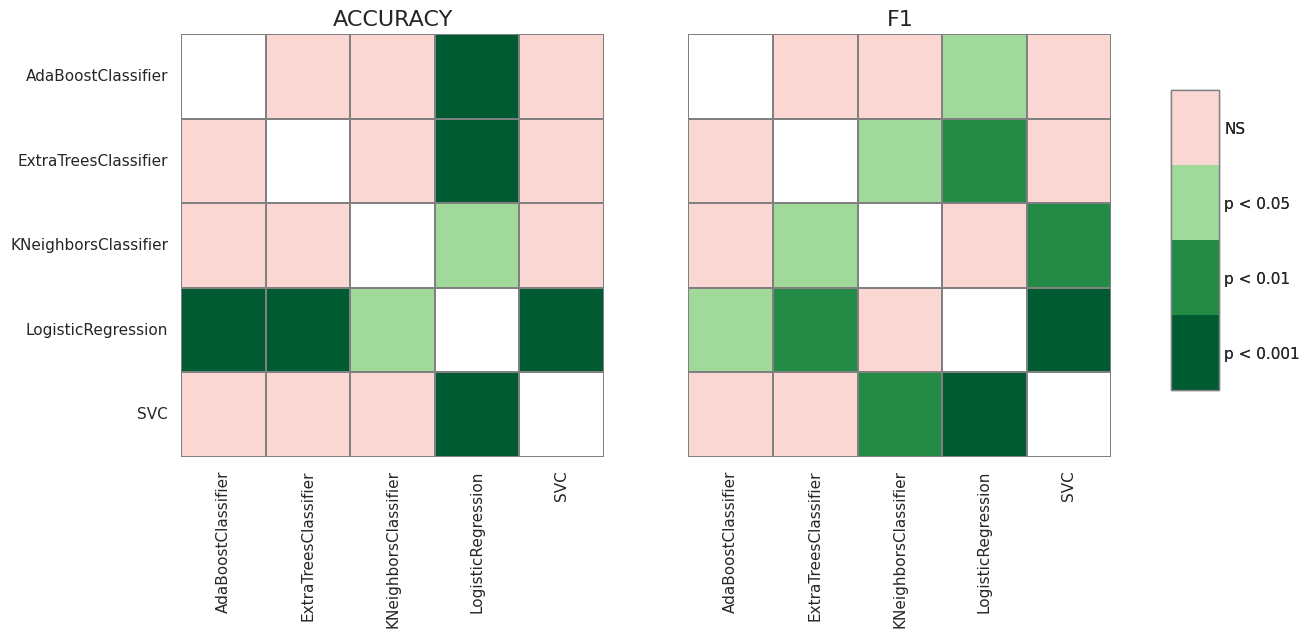

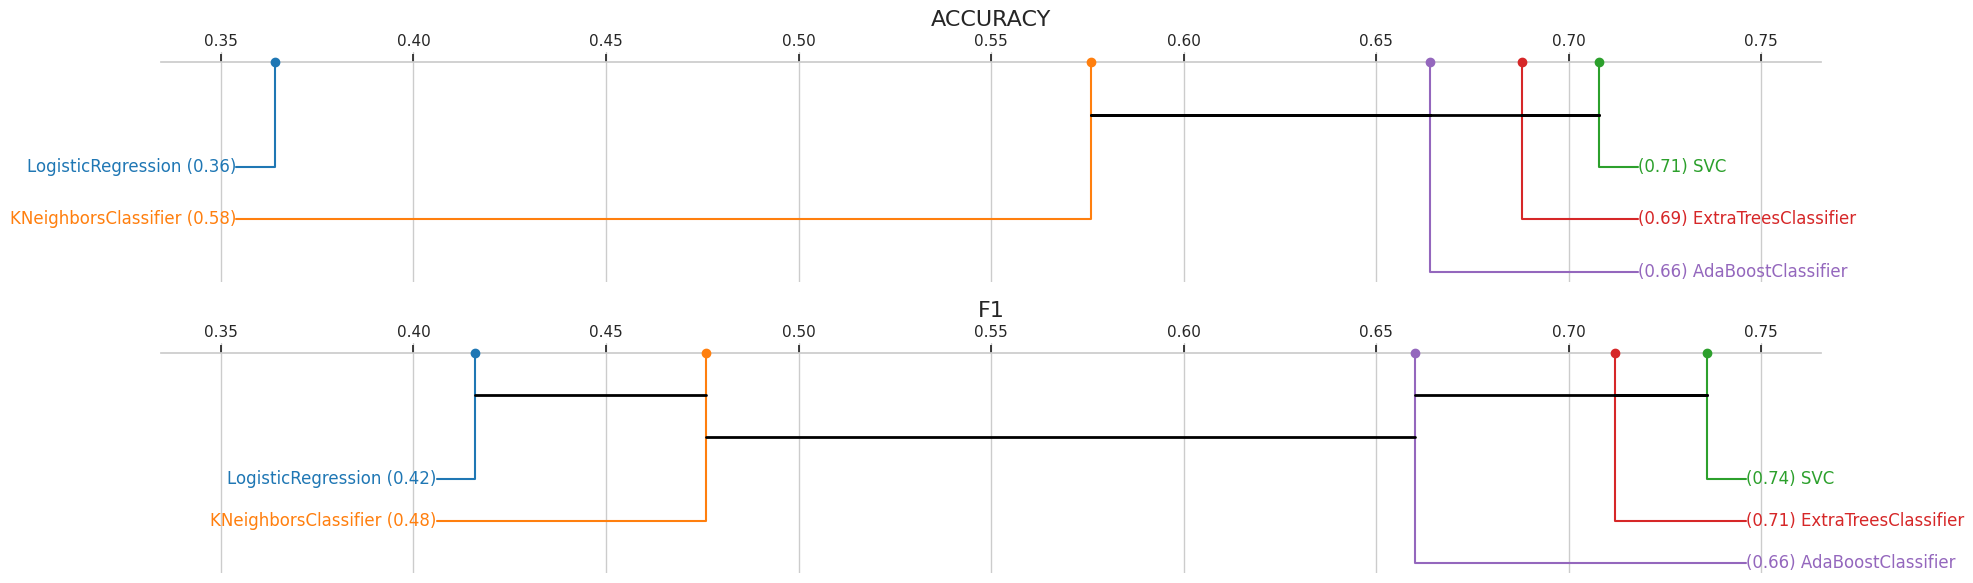

In [8]:
pc_results = StatisticalAnalysis.posthoc_conover_friedman(report_df=report_long, scoring_list=['accuracy','f1'])

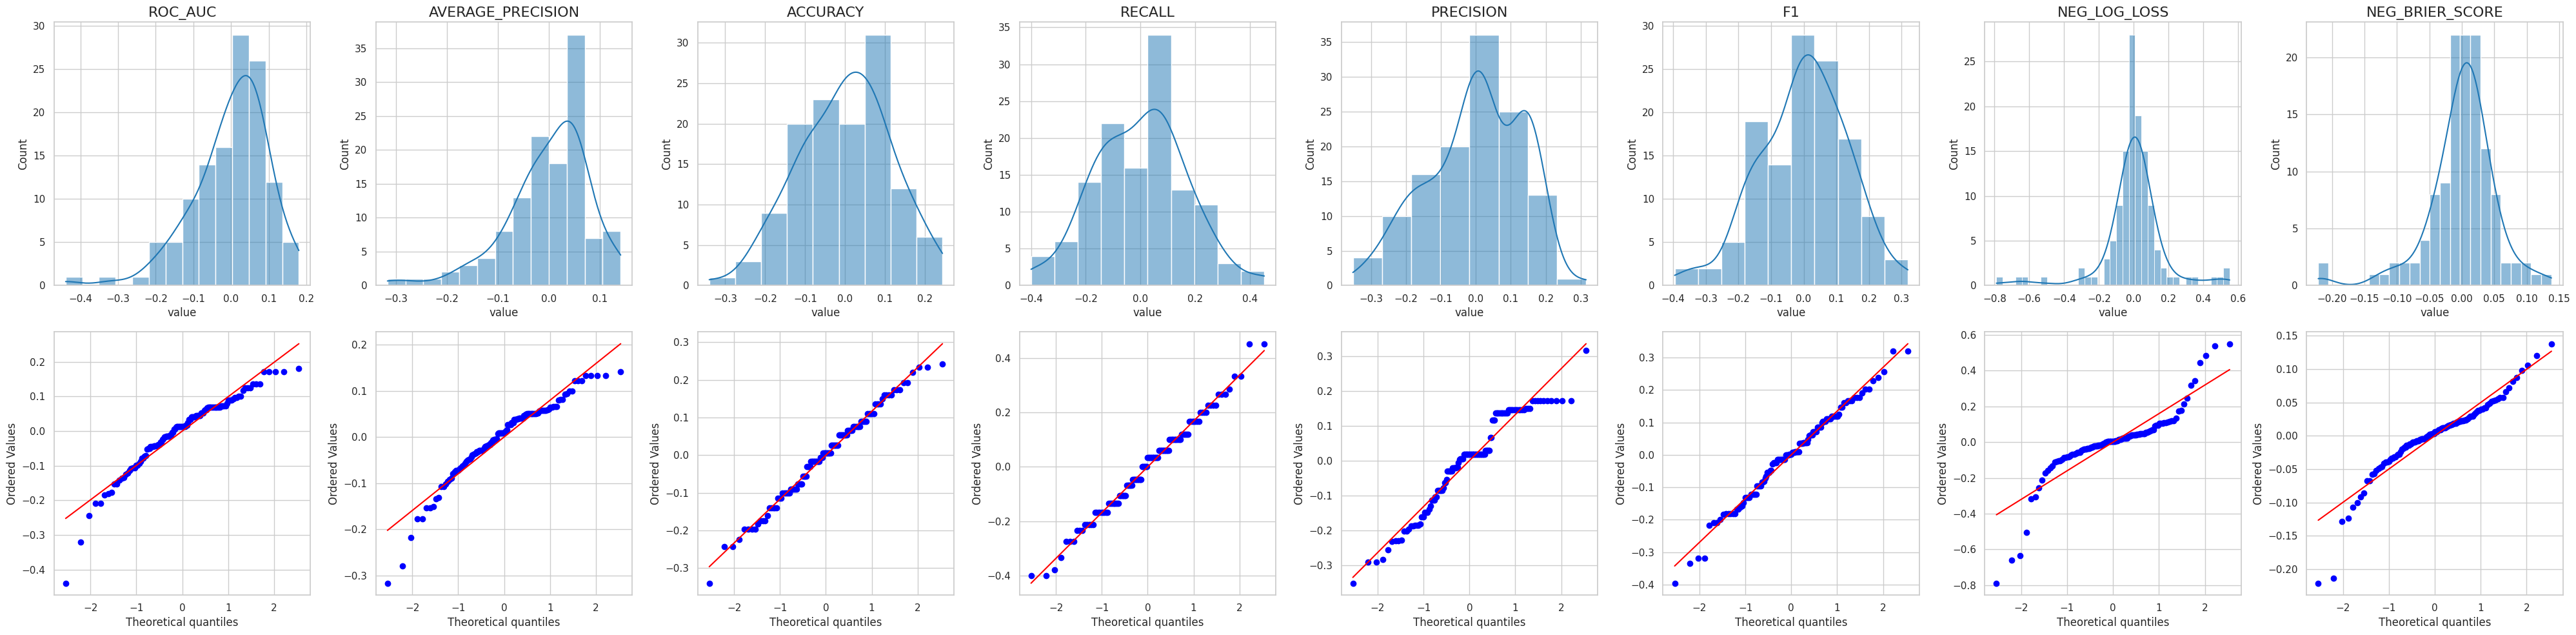

In [9]:
normal_report = StatisticalAnalysis.check_normality(report_long, scoring_list=scoring_list)

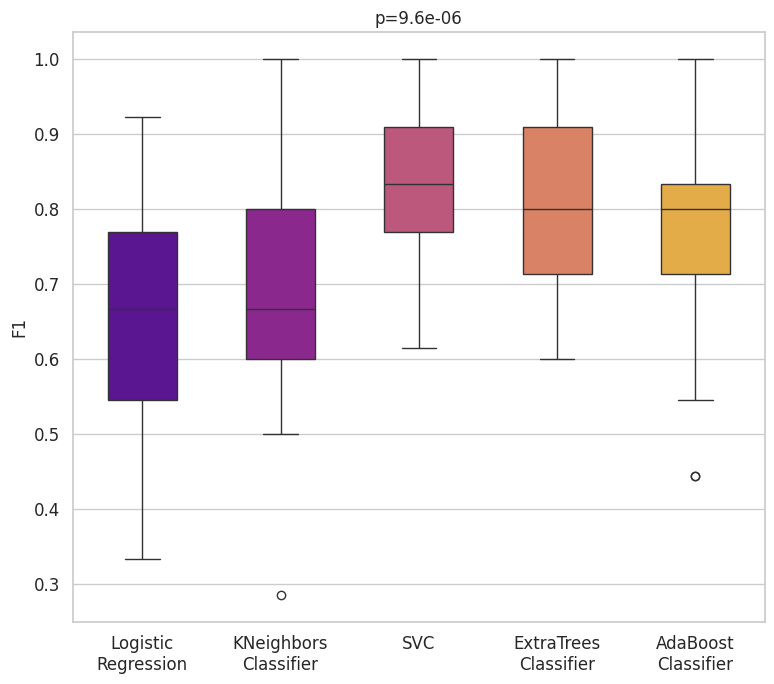

In [10]:
StatisticalAnalysis.test(report_long, scoring_list=["f1"])

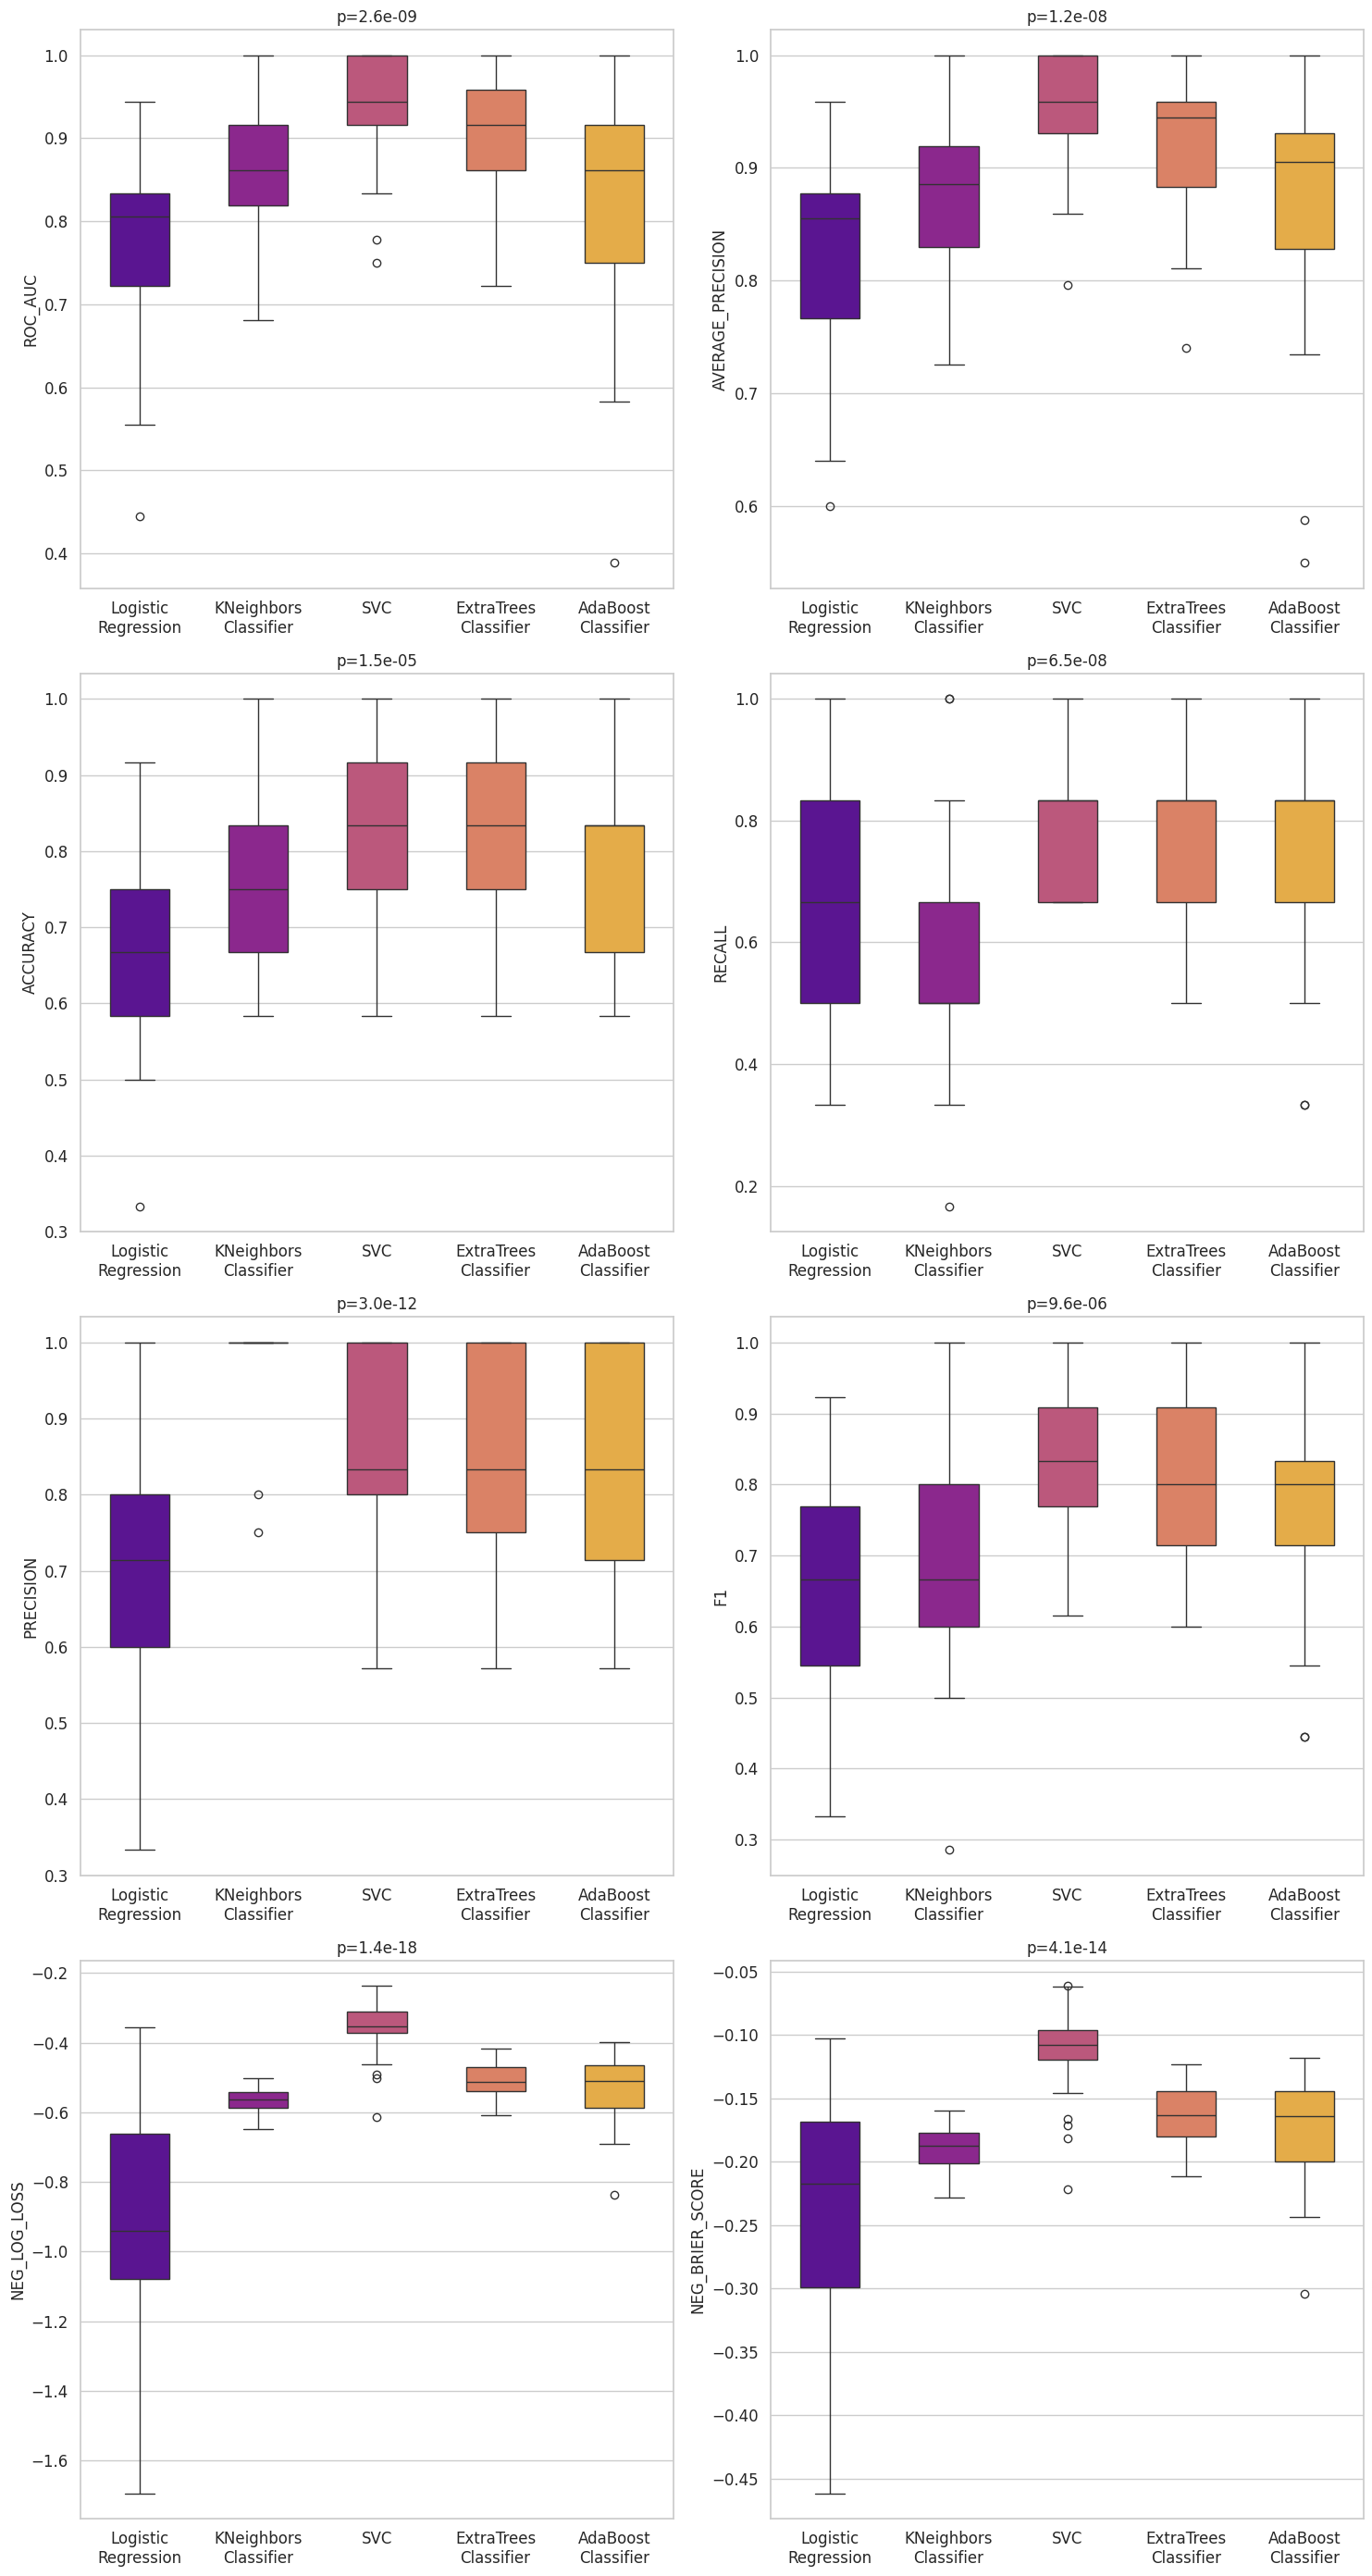

In [11]:
StatisticalAnalysis.test(report_long)